In [24]:
import pandas as pd
import numpy as np 
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")

print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


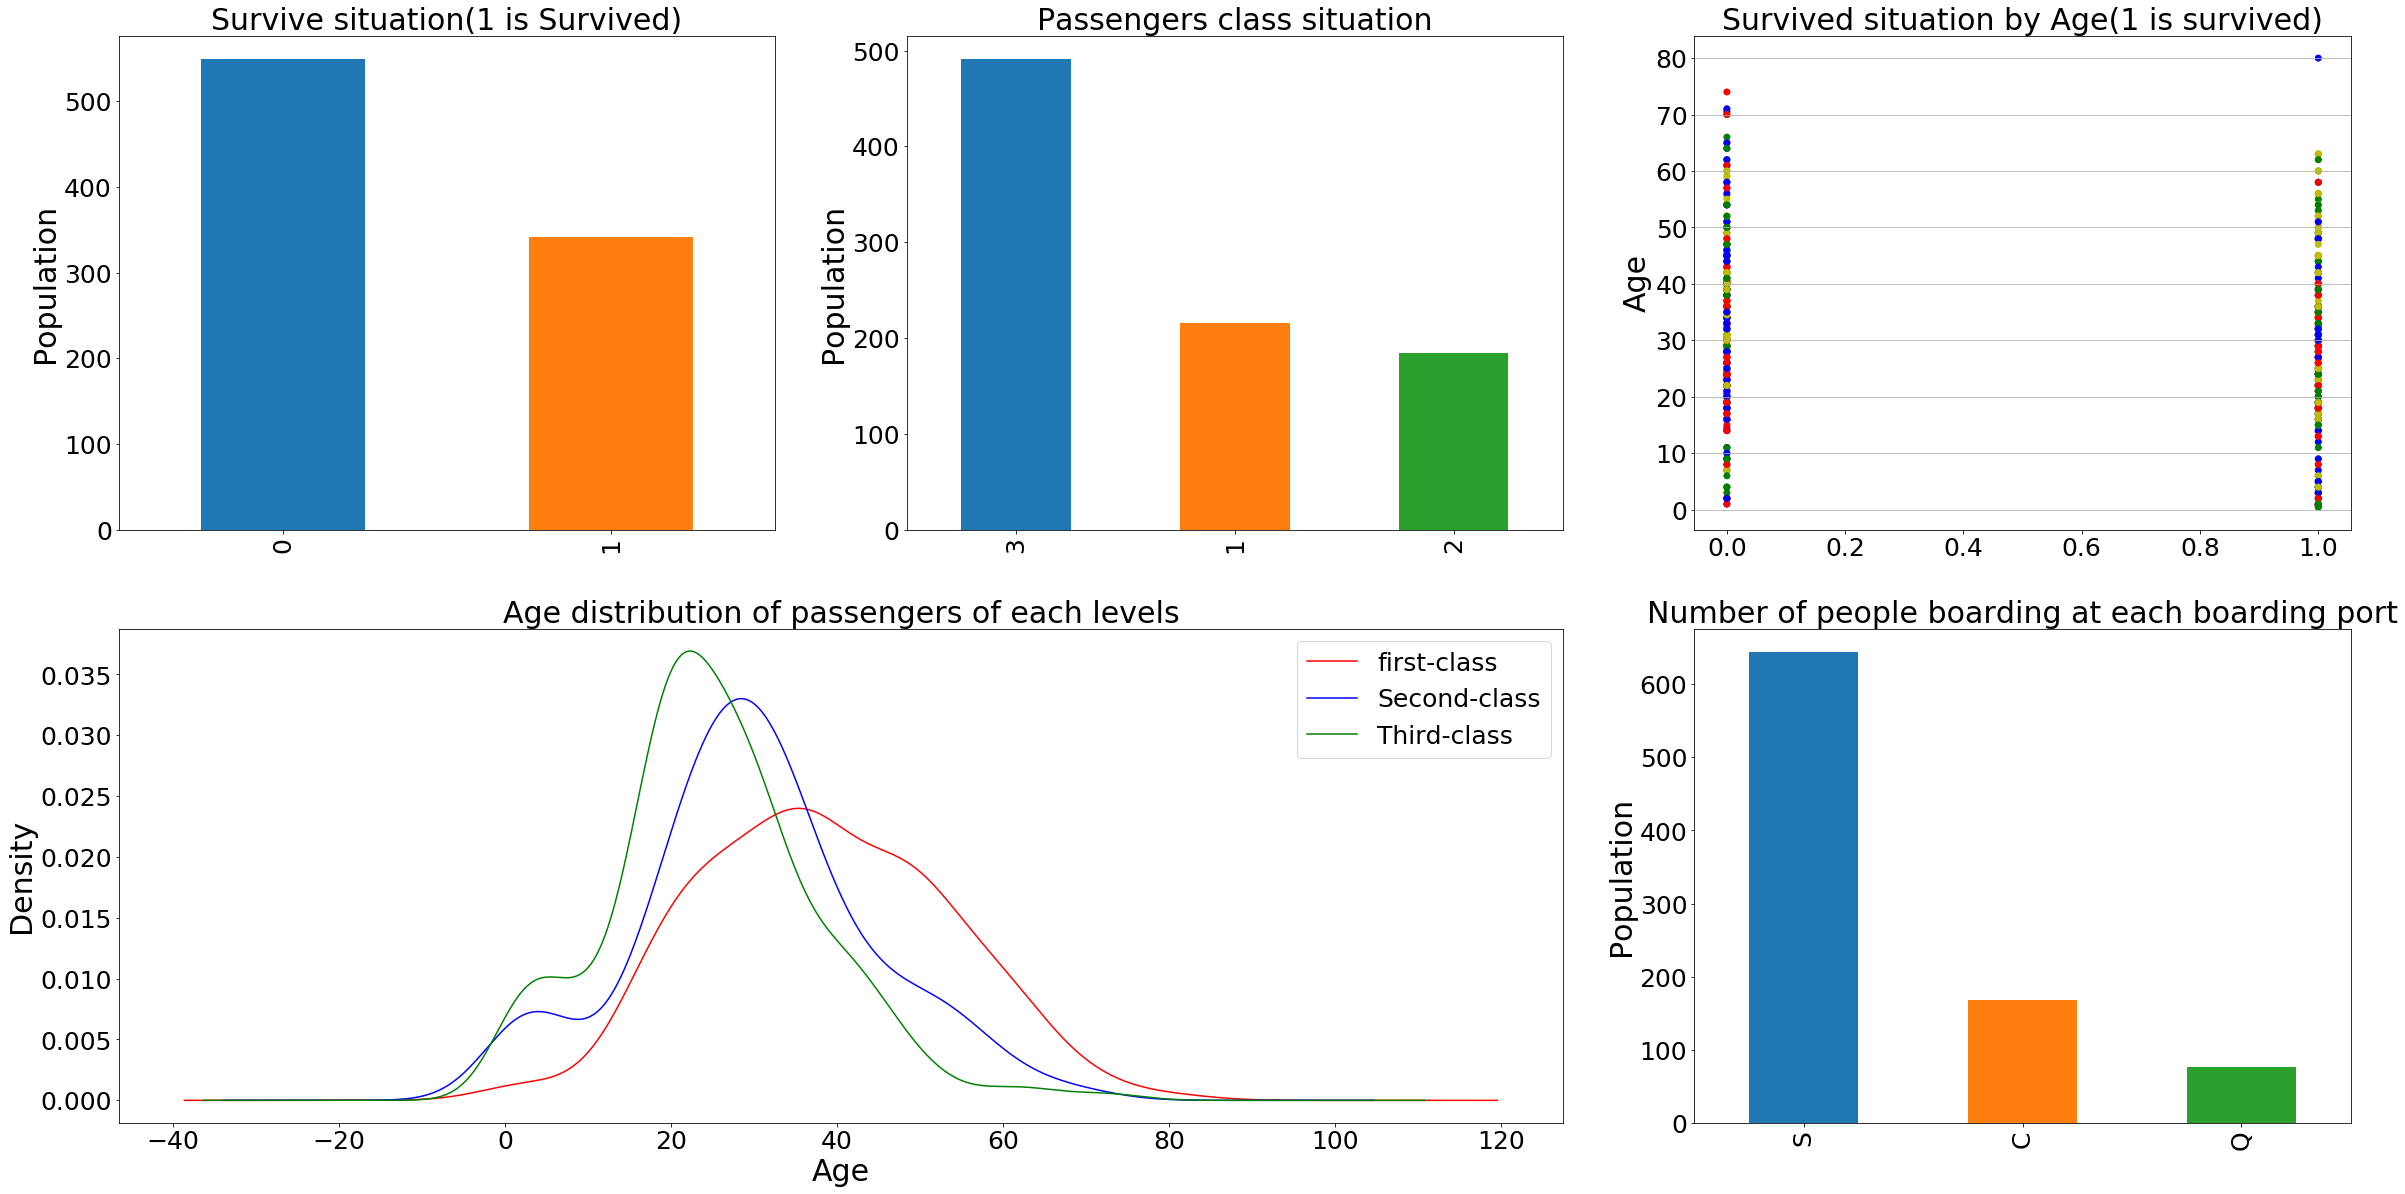

In [9]:
fig = plt.figure(12,(40,20))
fig.set(alpha=0.8)

plt.subplot2grid((2,3),(0,0))
train.Survived.value_counts().plot(kind='bar',fontsize=25)
plt.title('Survive situation(1 is Survived)',fontsize=30)
plt.ylabel('Population',fontsize=30)

plt.subplot2grid((2,3),(0,1))
train.Pclass.value_counts().plot(kind='bar',fontsize=25)
plt.title('Passengers class situation',fontsize=30)
plt.ylabel('Population',fontsize=30)

plt.subplot2grid((2,3),(0,2))
Cvalue=np.random.choice(['r','y','g','b'],len(train.Survived))
plt.scatter(train.Survived,train.Age,c=Cvalue)
plt.title('Survived situation by Age(1 is survived)',fontsize=30)
plt.grid(b=True, which='major', axis='y')
plt.ylabel('Age',fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


plt.subplot2grid((2,3),(1,0), colspan=2)
train.Age[train.Pclass == 1].plot(kind='kde',c='r',fontsize=25)   
train.Age[train.Pclass == 2].plot(kind='kde',c='b',fontsize=25)
train.Age[train.Pclass == 3].plot(kind='kde',c='g',fontsize=25)
plt.xlabel('Age',fontsize=30)
plt.ylabel('Density',fontsize=30) 
plt.title('Age distribution of passengers of each levels',fontsize=30)
plt.legend(('first-class', 'Second-class','Third-class'),loc='best',fontsize=25)

plt.subplot2grid((2,3),(1,2))
train.Embarked.value_counts().plot(kind='bar',fontsize=25)
plt.title('Number of people boarding at each boarding port',fontsize=30)
plt.ylabel('Population',fontsize=30)  
plt.show()

<Figure size 1440x1440 with 0 Axes>

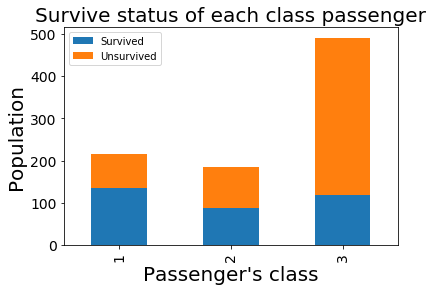

In [10]:
fig = plt.figure(12,(20,20))
fig.set(alpha=0.2)

Survived_0 = train.Pclass[train.Survived == 0].value_counts()
Survived_1 = train.Pclass[train.Survived == 1].value_counts()
df = pd.DataFrame({'Survived':Survived_1,'Unsurvived':Survived_0})
df.plot(kind='bar',stacked=True,fontsize=14)
plt.title('Survive status of each class passenger',fontsize=20)
plt.xlabel('Passenger\'s class',fontsize=20)
plt.ylabel('Population',fontsize=20)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x1440 with 0 Axes>

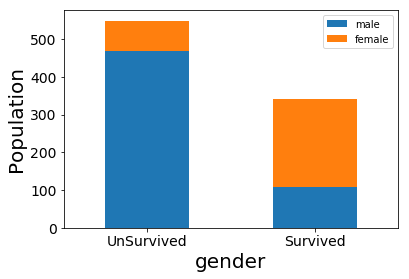

In [11]:
fig = plt.figure(12,(20,20))
fig.set(alpha=0.2)

Survived_m = train.Survived[train.Sex == 'male'].value_counts()
Survived_f = train.Survived[train.Sex == 'female'].value_counts()
df = pd.DataFrame({'male':Survived_m,'female':Survived_f})
df.plot(kind='bar',stacked=True,fontsize=14)
plt.xlabel('gender',fontsize=20)
plt.ylabel('Population',fontsize=20)
plt.xticks([0,1],['UnSurvived','Survived'],rotation=360)
plt.show

<Figure size 432x288 with 0 Axes>

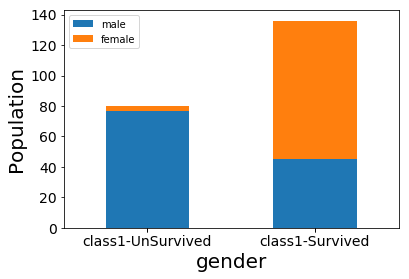

In [12]:
fig = plt.figure()
fig.set(alpha=0.2)
# plt.title('Survive status by gender and class')

# plt1 = fig.add_subplot(140)
Survived_m = train.Survived[(train.Sex == 'male')&(train.Pclass == 1)].value_counts()
Survived_f = train.Survived[(train.Sex == 'female')&(train.Pclass == 1)].value_counts()
df = pd.DataFrame({'male':Survived_m,'female':Survived_f})
df.plot(kind='bar',stacked=True,fontsize=14)
plt.xlabel('gender',fontsize=20)
plt.ylabel('Population',fontsize=20)
plt.xticks([0,1,0,1],['class1-UnSurvived','class1-Survived'],rotation=360)
plt.show()

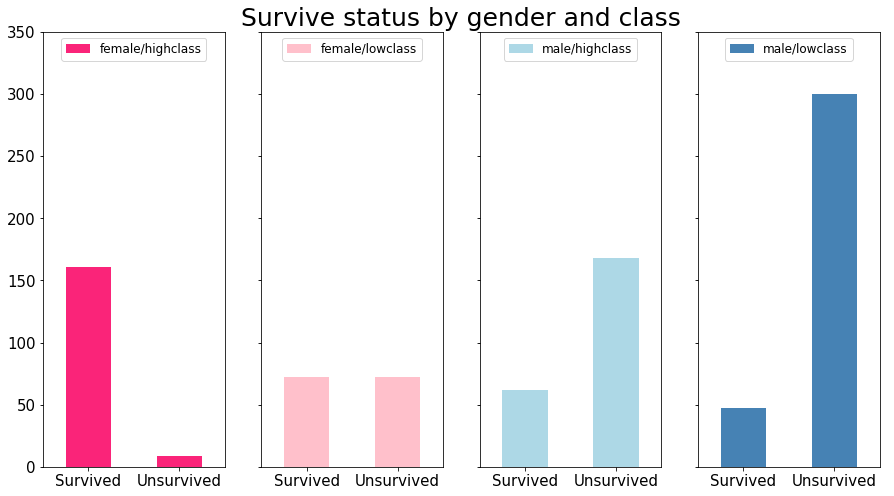

In [16]:
fig = plt.figure(None,(15,8))
fig.set(alpha=0.65)
plt.title('Survive status by gender and class',fontsize=25)
plt.axis('off')
#plt.xticks([]),plt.yticks([])

ax1 = fig.add_subplot(141)
train.Survived[train.Sex == 'female'][train.Pclass!=3].value_counts().plot(
    kind='bar',label='female highclass',color='#FA2479',fontsize=15)
ax1.set_xticklabels(['Survived','Unsurvived'],rotation=0)
ax1.legend(['female/highclass'],loc='upper center',fontsize=12)
ax1.axis([None,None,0,350])

ax1 = fig.add_subplot(142,sharey=ax1)
train.Survived[train.Sex == 'female'][train.Pclass==3].value_counts().plot(
    kind='bar',label='female lowclass',color='pink',fontsize=15)
ax1.set_xticklabels(['Survived','Unsurvived'],rotation=0)
ax1.legend(['female/lowclass'],loc='upper center',fontsize=12)

ax1 = fig.add_subplot(143,sharey=ax1)
train.Survived[train.Sex == 'male'][train.Pclass!=3].value_counts()[::-1].plot(
    kind='bar',label='male highclass',color='lightblue',fontsize=15)
ax1.set_xticklabels(['Survived','Unsurvived'],rotation=0)
ax1.legend(['male/highclass'],loc='upper center',fontsize=12)

ax1 = fig.add_subplot(144,sharey=ax1)
train.Survived[train.Sex == 'male'][train.Pclass==3].value_counts()[::-1].plot(
    kind='bar',label='male lowclass',color='steelblue',fontsize=15)
ax1.set_xticklabels(['Survived','Unsurvived'],rotation=0)
ax1.legend(['male/lowclass'],loc='upper center',fontsize=12)

plt.show()

In [17]:
set(np.ravel(train.Embarked.values))

{'C', 'Q', 'S', nan}

In [18]:
train.Embarked[train.Survived== 1].value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [19]:
train.Embarked[train.Survived== 0].value_counts()

S    427
C     75
Q     47
Name: Embarked, dtype: int64

<Figure size 720x432 with 0 Axes>

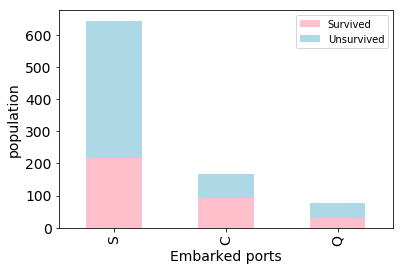

In [20]:
fig = plt.figure(None,(10,6))
fig.set(alpha=0.6)

# portset = set(np.ravel(train.Embarked.values))
# portp = []
# for port in portset:
#     portp.append(train.Survived[train.Embarked == port].value_counts())
Survived = train.Embarked[train.Survived== 1].value_counts()
Unsurvived = train.Embarked[train.Survived== 0].value_counts()
df = pd.DataFrame({'Survived':Survived,'Unsurvived':Unsurvived})
df.plot(kind='bar',stacked=True,fontsize=14,color=['pink','lightblue'])
plt.xlabel('Embarked ports',fontsize=14)
plt.ylabel('population',fontsize=14)
plt.show()

In [21]:
g = train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print(df)
g = train.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print(df)

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1


In [22]:
train.Cabin.value_counts().head()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
C22 C26        3
Name: Cabin, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def 